In [36]:
# %pip install seaborn
%pip install matplotlib inline


Note: you may need to restart the kernel to use updated packages.


In [37]:
# %pip install numpy 
# %pip install matplotlib 
# %pip install pandas

In [38]:
# %pip install keras

In [39]:
# reading the files from the directory 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 

directory = r'D:\image processing\dataset'

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1135262-0001.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1135262-0002.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1135262-0003.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1135262-0004.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1220485-0001.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1351146-0001.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1351146-0002.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1351146-0003.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1351146-0004.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1351146-0005.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERIA-1351146-0006.jpeg
D:\image processing\dataset\archive\chest_xray\test\COUGH\BACTERI

# importing the needed libraries 

In [40]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

# Labelling the data 

In [42]:
 #Labels for your classes
labels = ['COUGH', 'NORMAL']
img_size = 150  # Resize all images to 150x150


# loading the preprocessed data and resizing to our input needs

In [43]:
img_size = 150  # Ensure consistent image size (width, height)

def get_data(data_dir):
    data = []
    for label in ['COUGH', 'NORMAL']:
        path = os.path.join(data_dir, label)
        class_num = 0 if label == 'COUGH' else 1  # Assign class labels (0 = Pneumonia, 1 = Normal)
        
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    print(f"Could not read {img}, skipping.")
                    continue
                
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Resize all images to 150x150
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error loading image {img}: {e}")
    
    # Convert to a numpy array only after confirming all images are correctly processed
    return np.array(data, dtype=object)

# loading the dataset 

In [44]:
# Load the dataset
train_data = get_data('D:/image processing/dataset/archive/chest_xray/train')
test_data = get_data('D:/image processing/dataset/archive/chest_xray/test')


# Splitting data into training and validation sets 80 percent training 20 percent validation 

In [45]:
x_train = []
y_train = []

for feature, label in train_data:
    x_train.append(feature)
    y_train.append(label)

x_train = np.array(x_train) / 255  # Normalize pixel values between 0 and 1
x_train = x_train.reshape(-1, img_size, img_size, 1)  # Reshape for CNN input
y_train = np.array(y_train)


# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



# creating test data 

In [46]:
# Prepare test data
x_test = []
y_test = []

for feature, label in test_data:
    x_test.append(feature)
    y_test.append(label)

x_test = np.array(x_test) / 255  # Normalize the test data
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


# visualizing the data imbalance 

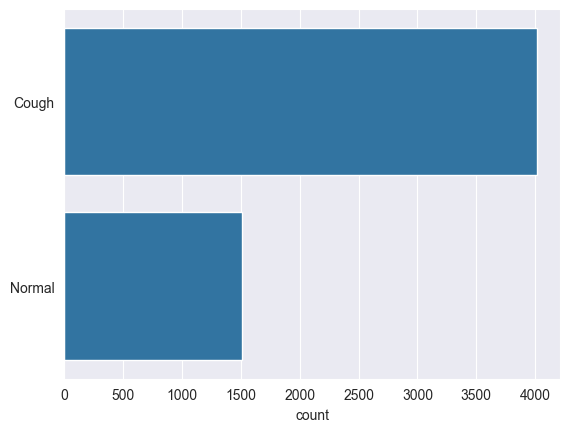

In [47]:
# Visualize data imbalance
l = []
for i in train_data:
    if i[1] == 0:
        l.append("Cough")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)
plt.show()



# Data augmentation to expand the data artifically using diff data augmentation techniques 

In [48]:

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Building the Cnn model 

In [49]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_10 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_11 (Ba  (None, 75, 75, 64)       

Learning rate reduction 

In [50]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)


# Training the Model


In [51]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=12, validation_data=(x_val, y_val), callbacks=[learning_rate_reduction])
model.save('D:/image processing/model/amps.keras')

Epoch 1/12
139/139 [==============================] - 42s 289ms/step - loss: 0.6938 - accuracy: 0.8014 - val_loss: 2.0733 - val_accuracy: 0.7303 - lr: 0.0010
Epoch 2/12
139/139 [==============================] - 40s 291ms/step - loss: 0.3538 - accuracy: 0.8514 - val_loss: 1.3670 - val_accuracy: 0.7303 - lr: 0.0010
Epoch 3/12
139/139 [==============================] - ETA: 0s - loss: 0.2915 - accuracy: 0.8776
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
139/139 [==============================] - 40s 286ms/step - loss: 0.2915 - accuracy: 0.8776 - val_loss: 0.9689 - val_accuracy: 0.6299 - lr: 0.0010
Epoch 4/12
139/139 [==============================] - 40s 290ms/step - loss: 0.2200 - accuracy: 0.9068 - val_loss: 1.8148 - val_accuracy: 0.7276 - lr: 3.0000e-04
Epoch 5/12
139/139 [==============================] - 72s 521ms/step - loss: 0.1931 - accuracy: 0.9247 - val_loss: 0.2172 - val_accuracy: 0.9032 - lr: 3.0000e-04
Epoch 6/12
139/139 [=====================

# Checking the overall loss and accuracy of the model 

In [52]:
    # Evaluate the model
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0])
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1] * 100, "%")

22/22 [==============================] - 2s 67ms/step - loss: 0.2154 - accuracy: 0.9192
Loss of the model is -  0.21543243527412415
22/22 [==============================] - 2s 67ms/step - loss: 0.2154 - accuracy: 0.9192
Accuracy of the model is -  91.91918969154358 %


# giving input to the model and testing 

In [53]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from ipywidgets import FileUpload, Output, VBox, Dropdown, HBox
from IPython.display import display

# Load your trained model (update the path as necessary)
model_path = 'D:/image processing/model/amps.keras'
try:
    model = load_model(model_path)
    print("Model loaded successfully.")
except OSError as e:
    print(f"Error loading model: {e}")

# Preprocessing function to handle image input
def preprocess_image(image, processor_type):
    img_resized = cv2.resize(image, (150, 150)) / 255.0  # Resize and normalize
    if processor_type == 'Grayscale':
        return np.expand_dims(img_resized, axis=-1)  # For grayscale input
    elif processor_type == 'RGB':
        return img_resized  # For RGB input
    return None

# Function to upload and predict using widgets
def upload_and_predict():
    # Create widgets for file upload and processor type selection
    uploader = FileUpload(accept='image/*', multiple=False)
    output = Output()
    
    processor_dropdown = Dropdown(
        options=['Grayscale', 'RGB'],  # Choose between grayscale or RGB input
        value='Grayscale',
        description='Processor:'
    )

    # Display widgets
    display(VBox([HBox([uploader, processor_dropdown]), output]))

    # Action when an image is uploaded
    def on_upload_change(change):
        with output:
            output.clear_output()  # Clear previous output
            if uploader.value:
                try:
                    # Get the uploaded image data
                    uploaded_file = next(iter(uploader.value))
                    image_data = uploaded_file.content
                    image_np = np.frombuffer(image_data, np.uint8)

                    # Decode the image as color
                    img = cv2.imdecode(image_np, cv2.IMREAD_COLOR)

                    # Preprocess based on selected processor type
                    processor_type = processor_dropdown.value
                    if processor_type == 'Grayscale':
                        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                        img_input = preprocess_image(img_gray, processor_type)
                    elif processor_type == 'RGB':
                        img_input = preprocess_image(img, processor_type)

                    # Make predictions using the model
                    img_input = np.expand_dims(img_input, axis=0)  # Add batch dimension
                    prediction = model.predict(img_input)
                    result = "Pharyngitis detected" if prediction[0][0] >= 0.5 else "No Pharyngitis detected"

                    # Display the image and result
                    plt.figure(figsize=(5, 5))
                    if processor_type == 'Grayscale':
                        plt.imshow(img_gray, cmap='gray')
                    else:
                        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Display RGB image
                    plt.title(result)
                    plt.axis('off')
                    plt.show()

                except Exception as e:
                    print(f"An error occurred: {str(e)}")
                    print("Please try uploading the image again.")

    # Observe file uploader for changes
    uploader.observe(on_upload_change, names='value')

# Call the function to upload image and make predictions
upload_and_predict()

Model loaded successfully.
